# Capítulo 8: Introducción a las redes neuronales

## Perceptrón para la función OR

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 9

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import numpy as np
import matplotlib.pyplot as plt

tasa = 0.001
n_iterac = 10
estado_alea = 47
errors = []

In [4]:
# Este método calcula el valor para z basado en los pesos
def obtener_z(X):
    z = np.dot(X,w) + b
    return z

In [5]:
# Este método permite predecir la clase de una instancia (función escalón)
def predecir(X):
    z = obtener_z(X)
    if (z>=0.0):
        y = 1
    else:
        y = 0
    return y

In [6]:
# Este método aplica la regla de aprendizaje
def entrenar(X, y):
    # lista para almacenar los errores calculados
    global w,b
    for i in range(n_iterac):
        error = 0
        errores_epoca = 0
        for xi, yi in zip(X, y):
            prediccion = predecir(xi)
            error = yi - prediccion
            if error != 0:
                actualizacion = tasa * error
                w +=  actualizacion * xi
                b +=  actualizacion
                errores_epoca += 1  # contar los errores reales
        errors.append(errores_epoca)
    return w,b

In [7]:
# datos de la operación booleana or
X = np.array( [[1, 1],
              [0, 1],
              [1, 0],
              [0, 0]])
y = np.array([1, 1, 1, 0])

#inicializamos los pesos
w = np.zeros(X.shape[1])
#inicializamos el sesgo (bias)
b = np.float_(0)

In [8]:
entrenar(X,y)
w, b

(array([0.001, 0.001]), -0.001)

In [9]:
#prueba 1
prueba1 = np.array([1,0])
y = predecir(prueba1)
print("La predicción es:", y)

La predicción es: 1


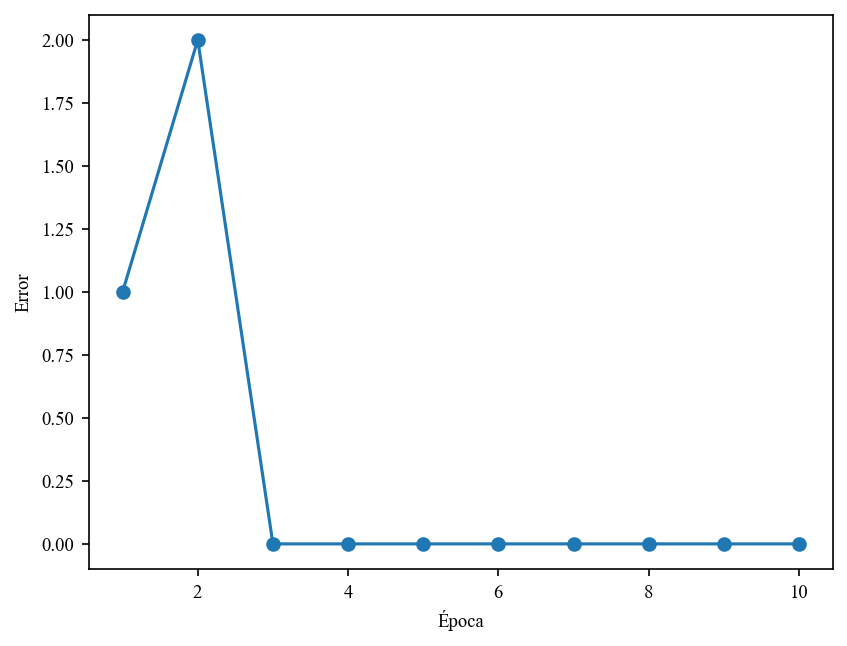

In [10]:
plt.figure(figure=(4,3))
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Época')
plt.ylabel('Error')
plt.show()

## Perceptrón para el dataset Iris

In [11]:
#importamos las librerias necesarios
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [12]:
# cargar el dataset iris
iris = load_iris()

In [13]:
# mostramos la primera instancia
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [14]:
# mostramos el nombre de las clases de flores
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
# mostramos el nombre de las variables descriptivas
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
# configuramos un dataframe de pandas
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["tipo"] = iris.target
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),tipo
60,5.0,2.0,3.5,1.0,1
56,6.3,3.3,4.7,1.6,1
40,5.0,3.5,1.3,0.3,0
85,6.0,3.4,4.5,1.6,1
74,6.4,2.9,4.3,1.3,1


In [17]:
# obtenemos X e y
X = df.iloc[0:100, [0,2] ]
y = df.iloc[0:100, 4]

In [18]:
# separar los datos en subconjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.2, random_state=47)

In [19]:
X_ent.shape, X_pru.shape, y_ent.shape, y_pru.shape

((80, 2), (20, 2), (80,), (20,))

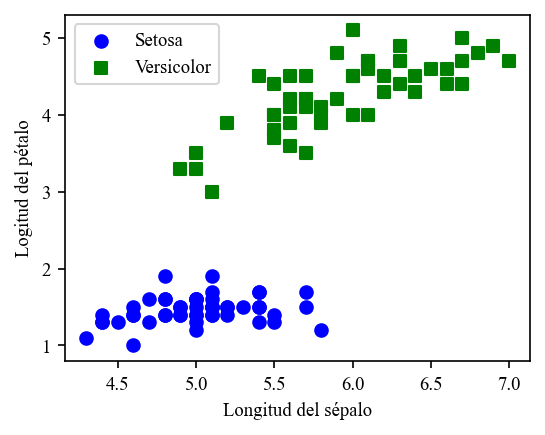

In [21]:
# dibujamos los puntos de datos
plt.figure(figsize=(4, 3))
plt.scatter(X.iloc[:50, 0], X.iloc[:50, 1],
            color='blue', marker='o', label='Setosa')
plt.scatter(X.iloc[50:100, 0], X.iloc[50:100, 1],
            color='green', marker='s', label='Versicolor')

plt.xlabel('Longitud del sépalo')
plt.ylabel('Logitud del pétalo')
plt.legend(loc='upper left')
plt.savefig("my_plot.jpg", dpi=300) 
plt.show()

In [23]:
from sklearn.linear_model import Perceptron
# se crea el objeto Perceptron max_iter(num épocas)=100  
perc = Perceptron(max_iter=100)
# entrenamos
perc.fit(X_ent, y_ent)

Perceptron(max_iter=100)

In [24]:
df_prueba = pd.DataFrame({'sepal length (cm)': [4], 'petal length (cm)': [5]})
y_pred = perc.predict(df_prueba)
if y_pred == 0:
    print("Setosa")
else:
    print("Versicolor")

Versicolor


In [25]:
#Generamos la matriz de confusión
from sklearn import metrics
# se calculan las predicciones de los datos de prueba
y_predicciones = perc.predict(X_pru)
print(metrics.confusion_matrix(y_true = y_pru, y_pred = y_predicciones))

[[ 9  0]
 [ 0 11]]


In [26]:
#cálculamos la exactitud
print("Exactitud: {:.2f}".format( metrics.accuracy_score(y_true = y_pru,
      y_pred = y_predicciones)*100))

Exactitud: 100.00


C:\Users\Carlos Pineda\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


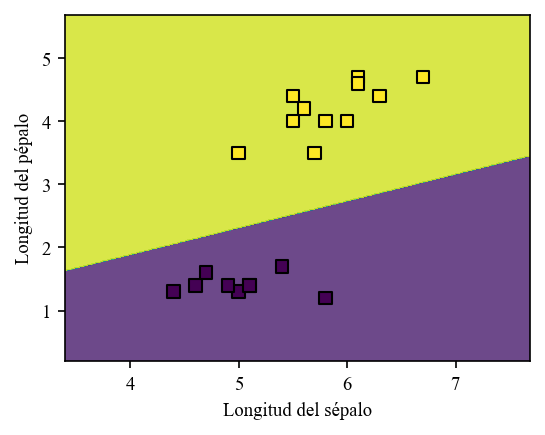

In [27]:
def plot_decision_boundary(X, y, clf):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, marker='s', edgecolors='k')
  
# Dibujamos el límite de decisión
plt.figure(figsize=(4, 3))
plot_decision_boundary(X_pru, y_pru, perc)
plt.xlabel('Longitud del sépalo')
plt.ylabel('Longitud del pépalo')
#plt.title('Perceptrón en el dataset Iris (Clase Versicolor vs Setosa)')
plt.savefig("my_plot.jpg", dpi=300) 
plt.show()

In [28]:
from PIL import Image
# Convertir a escala de grises
img = Image.open("my_plot.jpg").convert('L')
img.save('plot_grayscale.jpg', dpi=(300,300))

#### ADALINE SOBRE DATASET IRIS

In [26]:
tasa=0.01
n_iterac=100 

In [27]:
# Inicialización de pesos con valores pequeños aleatorios
w = np.random.rand(X.shape[1])
b = np.random.rand()

In [28]:
def entrenar(X, y):   
    global w,b
    for i in range(n_iterac):
        # Calcular la salida
        y_pred = obtener_z(X)
        # Calcular el error
        error = y - y_pred
        # Actualizar pesos y sesgo
        w += tasa * X.T.dot(error)
        b += tasa * error.sum() 

In [29]:
def obtener_z(X):
    return np.dot(X, w) + b  

In [30]:
def predecir(X):
    return np.where(obtener_z(X) >= 0.0, 1, -1)

In [31]:
entrenar(X_ent, y_ent)

In [32]:
prueba = np.array([[4 , 5]])
y_pred = predecir(prueba)
if y_pred == 0:
    print("La instancia corresponde a una flor: Setosa")
else:
    print("La instancia corresponde a una flor: Versicolor")

La instancia corresponde a una flor: Versicolor


In [33]:
#cálculamos la exactitud
# se calculan las predicciones de los datos de prueba
y_predicciones = perc.predict(X_pru)
print("Exactitud: {:.2f}".format( metrics.accuracy_score(y_true = y_pru,
      y_pred = y_predicciones)*100))

Exactitud: 100.00


#### BackPropagation

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
data = load_iris()
X = data['data'][:,0:2]  # Escogemos solo longitud del sepalo y ancho del sépalo
y = data['target']

# Escogemos solo las instancias etiquetadas como setosa (0) y versicolor (1)
X = X[y != 2]
y = y[y != 2].reshape(-1, 1)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
import numpy as np

# Función de activación (sigmoid)
def sigmoide(x):
    return 1 / (1 + np.exp(-x))

# Derivada de la función de activación
def derivada_sigmoide(x):
    return x * (1 - x)

num_entradas = 2
num_ocultas = 2
num_salidas = 1
W1 = np.random.randn(num_entradas, num_ocultas) * np.sqrt(2 / num_entradas)
W2 = np.random.randn(num_ocultas, num_salidas) * np.sqrt(2 / num_ocultas)
b1 = np.zeros((1, num_ocultas))
b2 = np.zeros((1, num_salidas))

X = X_train 
Y = y_train 
alpha = 0.01
num_iteraciones = 1000

for i in range(num_iteraciones):
    # Propagación hacia adelante
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoide(Z1) #capa oculta
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoide(Z2) # capa de salida
                
    # Retropropagación Salida - Oculta
    d_C_a2 = Y - A2 # error
    d_a2_z2 = derivada_sigmoide(A2) # sigmoide prima
    d_C_z2 = d_C_a2 * d_a2_z2
    d_C_W2 = np.dot(A1.T, d_C_z2) # derivada del costo respecto a los pesos W2
    d_C_b2 = np.sum(d_C_z2, axis=0, keepdims=True)

    # Retropropagación Oculta - Entrada   
    #d_C_a1 = np.dot(d_C_z2.T, W2)
    d_a1_z1 = derivada_sigmoide(A1)
             
    d_C_W1 = np.dot(X.T, np.dot(d_C_z2, W2.T) * d_a1_z1)
    d_C_b1 = np.sum(np.dot(d_C_z2, W2.T) * d_a1_z1, axis=0, keepdims=True)
    
    # Actualización de pesos y sesgos
    W1 -= alpha * d_C_W1
    W2 -= alpha * d_C_W2
    b1 -= alpha * d_C_b1
    b2 -= alpha * d_C_b2

In [37]:
# Parámetros
print("Pesos de la capa oculta:\n", W1)
print("Sesgos de la capa oculta:\n", W2)
print("Pesos de la capa de salida:\n", b1)
print("Sesgos de la capa de salida:\n", b2)

Pesos de la capa oculta:
 [[-1.07070542 -0.11310614]
 [-0.2944076   2.14282977]]
Sesgos de la capa oculta:
 [[1.84986482]
 [3.08433134]]
Pesos de la capa de salida:
 [[0.46932181 0.88085793]]
Sesgos de la capa de salida:
 [[3.03795376]]


In [38]:
def predict(X_prueba):
    Z1 = np.dot(X_prueba, W1) + b1
    A1 = sigmoide(Z1) #capa oculta
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoide(Z2) # capa de salida         
    return (A2 > 0.5).astype(int)

In [39]:
entrada = np.array([[4,5]])
entrada = scaler.transform(entrada)
p = predict(entrada)
if (p==0):
    print("La flor es de tipo setosa")
else: 
    print("La flor es de tipo versicolor")

La flor es de tipo versicolor


In [40]:
y_pred = predict(X_test)

# Evaluar el modelo
accuracy = np.mean(y_pred.flatten() == y_test)
print(f"Exactitud: {accuracy * 100:.1f}%")

Exactitud: 40.0%


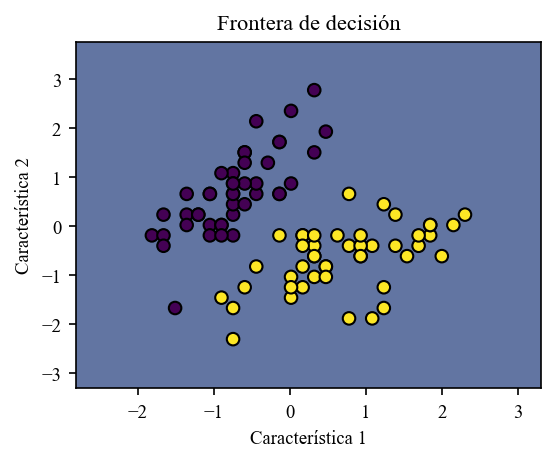

In [41]:
# Dibujar la separación de los puntos linealmente
def plot_decision_boundary(X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(4, 3))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.title('Frontera de decisión')
    plt.show()

# Visualizar la frontera de decisión
plot_decision_boundary(X_train, y_train)

### Red Neuronal para detectar la Deserción

In [1]:
import numpy as np
import pandas as pd
df = pd.read_excel('../datasets/datos_desercion.xlsx')

In [2]:
df.head(5)

,edad,genero,estado_civil,estrato,icfes,total_materias_perdidas,cant_reingresos,ult_promedio_acad,acceso_plataforma_horas,deserta
0,26,M,soltero,1,230,7,1.0,3.1,0.5,si
1,30,M,soltero,1,139,5,2.0,2.5,0.8,si
2,24,M,soltero,1,237,3,0.0,2.9,0.0,si
3,22,M,soltero,2,236,2,0.0,4.1,3.0,no
4,27,M,soltero,0,352,8,1.0,1.9,0.0,si


In [3]:
df.isna().sum()

edad                       0
genero                     0
estado_civil               0
estrato                    0
icfes                      0
total_materias_perdidas    0
cant_reingresos            1
ult_promedio_acad          0
acceso_plataforma_horas    0
deserta                    0
dtype: int64

In [4]:
df['estado_civil'].value_counts()

estado_civil
soltero        99
Unión Libre     1
Name: count, dtype: int64

In [5]:
#preprocesamiento
df.drop(columns=['estado_civil'], inplace=True)
df.fillna(value=df.cant_reingresos.mean(), inplace=True)

In [6]:
d1 = {'M': 1, 'F':0}
df['genero'] = df['genero'].map(d1)
d2 = {'si': 1, 'no':0}
df['deserta'] = df['deserta'].map(d2)

In [7]:
df

,edad,genero,estrato,icfes,total_materias_perdidas,cant_reingresos,ult_promedio_acad,acceso_plataforma_horas,deserta
0,26,1,1,230,7,1.0,3.1,0.5,1
1,30,1,1,139,5,2.0,2.5,0.8,1
2,24,1,1,237,3,0.0,2.9,0.0,1
3,22,1,2,236,2,0.0,4.1,3.0,0
4,27,1,0,352,8,1.0,1.9,0.0,1
...,...,...,...,...,...,...,...,...,...
95,23,1,1,190,3,1.0,4.1,1.0,0
96,26,1,1,280,1,1.0,3.7,3.0,0
97,20,1,1,224,7,0.0,0.1,1.0,1
98,18,1,1,188,8,0.0,2.0,1.0,1


In [8]:
X = df.iloc[:,:-1].values
y = df.iloc[:,8].values

from sklearn.model_selection import train_test_split
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.2, random_state=1)

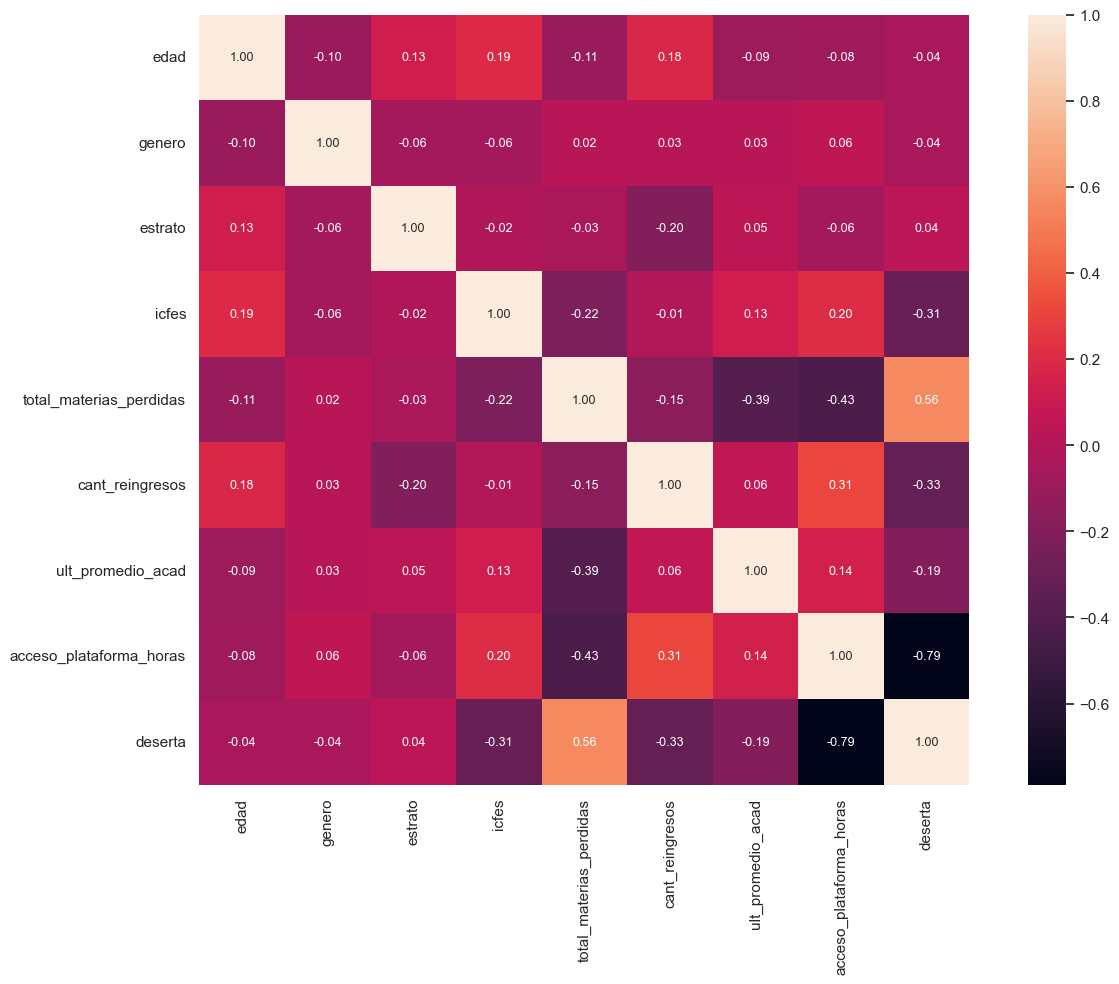

In [10]:
import seaborn as sb
import matplotlib.pyplot as plt
cm = np.corrcoef(df.values.T)
sb.set(rc = {'figure.figsize':(15,10)})
hm = sb.heatmap(cm, cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':9},
                yticklabels=df.columns,
                xticklabels=df.columns
                )
plt.savefig("my_plot.jpg", dpi=300) 
pl.show(7,7)

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input
modelo = Sequential()
modelo.add(Input(shape=(8,)))
modelo.add(Dense(units=500, activation='relu')), 
modelo.add(Dense(units=200, activation='relu'))
modelo.add(Dense(units=100, activation='relu'))
modelo.add(Dense(units=10, activation='relu'))
modelo.add(Dense(units=1, activation='sigmoid'))

In [12]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 500)                 │           4,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │         100,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125,821 (491.49 KB)

 Trainable params: 125,821 (491.49 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
import io
stream = io.StringIO()
modelo.summary(print_fn=lambda x: stream.write(x + '\n'))
summary_string = stream.getvalue()
stream.close()

# Dibujarlo con matplotlib
plt.figure(figsize=(10, 6))
plt.axis('off')
plt.text(0, 1, summary_string, fontfamily='monospace', fontsize=10, va='top')
plt.savefig('modelo_summary.jpg', bbox_inches='tight', dpi=300)
plt.close()

In [13]:
# Compilamos  el modelo
modelo.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
historico = modelo.fit(X_ent, y_ent, epochs=200, verbose=1)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5711 - loss: 3.5103
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5602 - loss: 1.2081
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3945 - loss: 0.8597
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4477 - loss: 0.8129
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5672 - loss: 1.1712
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5336 - loss: 0.7546
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6602 - loss: 0.7600
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3680 - loss: 1.1781
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6211 - loss: 0.8353
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5805 - loss: 0.6495
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6328 - loss: 0.6425
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6766 - lo

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9734 - loss: 0.1005
Epoch 138/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9656 - loss: 0.1026
Epoch 139/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9250 - loss: 0.1590
Epoch 140/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9336 - loss: 0.1560
Epoch 141/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9797 - loss: 0.0711
Epoch 142/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9539 - loss: 0.1070
Epoch 143/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9453 - loss: 0.1322
Epoch 144/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9555 - loss: 0.1150
Epoch 145/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9477 - loss: 0.1097
Epoch 146/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9219 - loss: 0.1630
Epoch 147/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9773 - loss: 0.0850
Epoch 148/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.98

In [15]:
pred= modelo.predict(X_ent)
puntajes = modelo.evaluate(X_ent, y_ent, verbose=0)
print('Exactitud sobre datos de entrenamiento: {:.2f} \n Error sobre datos de entrenamiento: {:.2f}'.format(puntajes[1], 1 - puntajes[1]))

pred= modelo.predict(X_pru)
puntajes2 = modelo.evaluate(X_pru, y_pru, verbose=0)
print('Exactitud sobre datos de prueba: {:.2f} \n Error sobre datos de prueba: {:.2f}'.format(puntajes2[1], 1 - puntajes2[1]))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Exactitud sobre datos de entrenamiento: 0.98 
 Error sobre datos de entrenamiento: 0.02
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Exactitud sobre datos de prueba: 0.90 
 Error sobre datos de prueba: 0.10


In [16]:
modelo.save("modelo.h5")

### Red Neuronal para clasificar dígitos manuscritos

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Dense, Flatten, Input

In [10]:
# cargamos los datos del módulo datasets de Keras
((X_ent, y_ent), (X_pru, y_pru)) = tf.keras.datasets.mnist.load_data()

In [11]:
# Normalizamos la imagenes
X_ent = X_ent/np.float32(255)
y_ent = y_ent.astype(np.int32)  
X_pru = X_pru/np.float32(255)
y_pru = y_pru.astype(np.int32)

In [12]:
modelo = tf.keras.Sequential([
    Input(shape=(28,28)),    
    Flatten(),
    Dense(128,  activation='relu'),
    Dense(10, activation='softmax')    
])
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
modelo.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [14]:
history = modelo.fit(X_ent,y_ent, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8662 - loss: 0.4757 - val_accuracy: 0.9559 - val_loss: 0.1538
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9615 - loss: 0.1310 - val_accuracy: 0.9680 - val_loss: 0.1135
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9741 - loss: 0.0864 - val_accuracy: 0.9698 - val_loss: 0.1000
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9826 - loss: 0.0581 - val_accuracy: 0.9728 - val_loss: 0.0905
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9860 - loss: 0.0467 - val_accuracy: 0.9736 - val_loss: 0.0874
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9895 - loss: 0.0343 - val_accuracy: 0.9733 - val_loss: 0.0937
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9921 - loss: 0.0272 - val_accuracy: 0.9746 - val_loss: 0.0864
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9929 - loss: 0.0236 - 

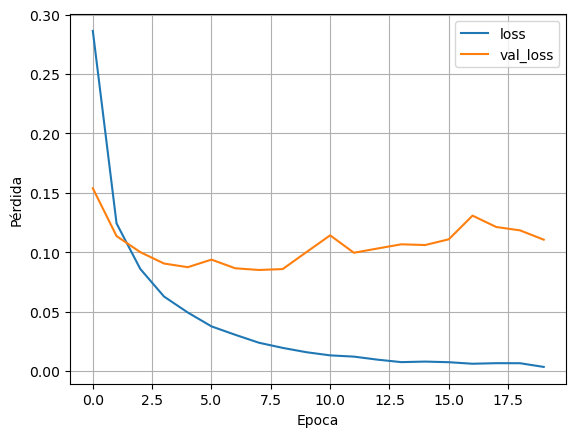

In [15]:
plt.plot(figsize=(4,4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoca')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

In [371]:
pred= modelo.predict(X_ent)
puntajes = modelo.evaluate(X_ent, y_ent, verbose=0)
print('Exactitud sobre datos de entrenamiento: {:.2f}'.format(puntajes[1]))

pred= modelo.predict(X_pru)
puntajes2 = modelo.evaluate(X_pru, y_pru, verbose=0)
print('Exactitud sobre datos de prueba: {:.2f}'.format(puntajes2[1]))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Exactitud sobre datos de entrenamiento: 0.99
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Exactitud sobre datos de prueba: 0.98
